In [13]:
import numpy as np

In [4]:
import keras
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
import pandas as pd

df_train = pd.read_csv('http://34.82.108.37/amazonReviewsTrain.csv.zip')
df_test = pd.read_csv("http://34.82.108.37/amazonReviewsTest.csv")
category_columns = ["rating"]
df_train = pd.get_dummies(df_train, columns = category_columns)
df_train


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,rating_negative,rating_neutral,rating_positive
0,True,"05 4, 2017",A2QNLVLQHW6OOC,B00NEZNT74,Jason L.,Have 30 of these in operation great lights,Five Stars,1493856000,NaN,{'Size:': ' 4PC'},NaN,0,0,1
1,True,"12 1, 2014",A32SHV461SUWNQ,B002Q0WTCE,Richard C.,"Good replacement. I prefer my Rovner L5, but ...",Good replacement. I prefer my Rovner L5,1417392000,NaN,NaN,NaN,0,0,1
2,True,"12 23, 2015",A2SKHG5ULPYIMC,B0002GFP9I,BellaLatinaReina-ACP Zero-Nine-Five,My son & band teacher loves it. Really nice. B...,Really Helps With Their Practice Pad,1450828800,NaN,NaN,NaN,0,0,1
3,True,"09 4, 2013",A2MFJ6C67AL015,B003AJVKDO,BOS116,This was a gift for a friend who is a fan of t...,Guitar picks,1378252800,NaN,{'Color:': ' Logo'},NaN,0,0,1
4,True,"08 28, 2015",ACYCDUUE9A3T2,B004XNK7AI,jack edwards,Wish it would attach to my violin a little eas...,... to my violin a little easier but it works ...,1440720000,NaN,{'Color:': ' Black - SN-5'},NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221387,True,"08 16, 2015",A1TWEBKVZDD2JJ,B0002H05BA,Obey Giant,Still hard to beat D'Addario. Hope they keep i...,Five Stars,1439683200,NaN,"{'Size:': ' Regular Light, 10-46', 'Style:': '...",NaN,0,0,1
221388,True,"01 8, 2012",AP32V2GXAK9VM,B000WME8C2,Grey,Ortofon hits the nail right on the head with t...,Headshell Impovment? YES!!!,1325980800,7.0,{'Color:': ' Black'},NaN,0,0,1
221389,True,"10 22, 2017",A4BIHE0AYAMTP,B00MD7S06O,divbyzero,This is my absolute favorite guitar strap amon...,ecclesiastical / hippie,1508630400,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,0,0,1
221390,True,"01 9, 2016",A3OCE03MZ2PC2J,B0017PLYCK,scaper,nice,Five Stars,1452297600,NaN,NaN,NaN,0,0,1


In [5]:
X = df_train["summary"].astype(str)
Y = df_train[["rating_positive","rating_negative","rating_neutral"]]
X

0                                                Five Stars
1                   Good replacement. I prefer my Rovner L5
2                      Really Helps With Their Practice Pad
3                                              Guitar picks
4         ... to my violin a little easier but it works ...
                                ...                        
221387                                           Five Stars
221388                         Headshell Impovment?  YES!!!
221389                              ecclesiastical / hippie
221390                                           Five Stars
221391                                Great polishing cloth
Name: summary, Length: 221392, dtype: object

In [6]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X)

# Directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(X, mode='tfidf')
# let's look at an example of an encoding ...
print(one_hot_results[0])

[0.         1.67100046 1.86727758 ... 0.         0.         0.        ]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(one_hot_results, Y, test_size = 0.2, random_state=42)
Y_test

,rating_positive,rating_negative,rating_neutral
5028,0,1,0
133605,1,0,0
182161,1,0,0
137498,1,0,0
122233,0,0,1
...,...,...,...
45935,1,0,0
5691,1,0,0
83947,1,0,0
214291,0,0,1


In [9]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(2000,)))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(3, activation='sigmoid'))
network.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history = network.fit(
      X_train, Y_train,
      steps_per_epoch=100,
      epochs=10,
      validation_split=0.2,
      validation_steps=50)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
100/100 [==============================] - 5s 19ms/step - loss: 0.5506 - accuracy: 0.8627 - val_loss: 0.3642 - val_accuracy: 0.8834
Epoch 2/10
100/100 [==============================] - 1s 12ms/step - loss: 0.3026 - accuracy: 0.8992 - val_loss: 0.2953 - val_accuracy: 0.9012
Epoch 3/10
100/100 [==============================] - 1s 12ms/step - loss: 0.2599 - accuracy: 0.9090 - val_loss: 0.2850 - val_accuracy: 0.9048
Epoch 4/10
100/100 [==============================] - 1s 12ms/step - loss: 0.2413 - accuracy: 0.9144 - val_loss: 0.2813 - val_accuracy: 0.9068
Epoch 5/10
100/100 [==============================] - 1s 12ms/step - loss: 0.2278 - accuracy: 0.9188 - val_loss: 0.2799 - val_accuracy: 0.9062
Epoch 6/10
100/100 [==============================] - 1s 12ms/step - loss: 0.2161 - accuracy: 0.9232 - val_loss: 0.2809 - val_accuracy: 0.9051
Epoch 7/10
100/100 [==============================] - 1s 11ms/step - loss: 0.2052 - accuracy: 0.9266 - val_loss: 0.2830 - val_accuracy: 0.9042

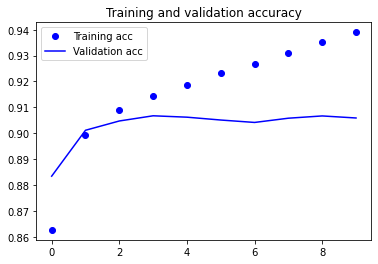

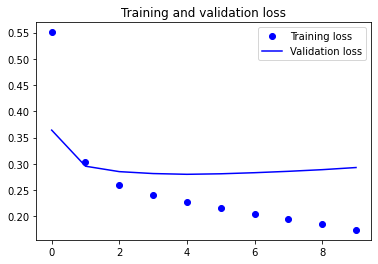

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
X = df_test["summary"].astype(str)
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X)

# Directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(X, mode='tfidf')
# let's look at an example of an encoding ...
print(one_hot_results[0])
predictions = network.predict(one_hot_results)
classes = np.argmax(predictions, axis=1)

[0. 0. 0. ... 0. 0. 0.]
313/313 [==============================] - 1s 3ms/step


In [16]:
classes
predictions = []
for i in classes:
  if i == 0:
    predictions.append("positive")
  if i == 1:
    predictions.append("negative")
  if i == 2:
    predictions.append("neutral")


In [19]:

with open(r'amazonReviewsPredictions.txt', 'w') as fp:
    for item in predictions:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')
from google.colab import files
files.download('amazonReviewsPredictions.txt')

Done


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
def test():
  i = 0
  answers = ['negative', 'neutral', 'positive']
  with open('amazonReviewsPredictions.txt', 'r') as outfile:
    lines = outfile.readlines()
    for line in lines:
        if line.strip() not in answers:
          return("invalid entry line %i" % (i))
        i += 1
    if i != 10000:
      return ("incorrect number of lines")
    else:
      return ("file looks ok")
test()

'file looks ok'

# Results
I took a simple approach from the NLP lab to classify Amazon instrument review sentiment. I downloaded the data, and encoded the label sentiments into three columns of ratings. Then I preprocessed the summaries of the reviews with the tokenizer with TFIDF data. This is basically one hot encoding the words from a list of 2000 common words. I then broke up the training data into training and testing data so I could evaluate the performance of my model. My model is a simple sequential deep neural network used in the NLP lab. The accuracy was pretty good, I would get over 0.90 in the training data and it stalled at 0.90 in the testing data. There was some overfitting but the accuracy of the model was still pretty good. The predictions for the testing data had some post processing. I had some difficulty with this since I dont believe we ever needed the original labels in any of our labs. I saved the list of predictions to a txt file and ran the test function to make sure the formatting was ok.